## Integration

### Trapezoidal Rule

In [1]:
class Integral(object):
    '''
    Based on code from 'A Primer on Scientific Programming with Python', 5e. Hans Petter Langtangen
    Uses the trapezoidal rule
    '''
    
    def __init__(self, f, n=500):
        self.f, self.n = f, n
    def __call__(self, a, b):
        h = (b-a)/float(self.n)
        I = 0.5*self.f(a)
        for i in range(1, self.n):
            I += self.f(a + i*h)
        I += 0.5*self.f(b)
        I *= h
        return I

In [2]:
from math import pi

def function(x):
    return x**2

G = Integral(function)
value = G(0, 2*pi)

print(value)

82.68356984760848


### Verification via Symbolic Computing

Note: This was sourced directly from 'A Primer on Scientific Programming with Python', 5e. Hans Petter Langtangen. Wanted to have it as a reference in case I want to do something like this in the future. 

Note: Integral class is inefficient if used for plotting. Calculations are repeated for consecutive values of x. Optimize if planning to use for plotting.

In [3]:
import sympy as sp
from math import cos

x = sp.Symbol('x')
f_expr = sp.cos(x) + 5*x
print(f_expr)

5*x + cos(x)


In [4]:
F_expr = sp.integrate(f_expr, x)
print(F_expr)

5*x**2/2 + sin(x)


In [5]:
F = sp.lambdify([x], F_expr) # turn F_expr to F(x) function
print('(5/2)(1)^2 + sin(1) =', F(1))

(5/2)(1)^2 + sin(1) = 3.3414709848078967


In [6]:
# Using such functionality to do exact integration, we can write our test function as:
def test_Integral():
    # The Trapezoidal rule is exact for linear functions
    import sympy as sp
    x = sp.Symbol('x')
    f_expr = 2*x + 5
    # Turn sympy expression into plain Python function f(x)
    f = sp.lambdify([x], f_expr)
    # Find integral of f_expr and turn into plain Python function F
    F_expr = sp.integrate(f_expr, x)
    F = sp.lambdify([x], F_expr)
    
    a = 2
    x = 6
    exact = F(x) - F(a)
    computed_F = Integral(f)
    computed = computed_F(2, 6)
    diff = abs(exact - computed)
    tol = 1E-13
    assert diff < tol, 'bug in class Integral, diff=%s' % diff

test_Integral()

### Numerical Integration (Scipy)

In [7]:
from scipy.integrate import quad

def f(x):
    return x**2

integral, error = quad(f, 0, 2*pi)

print('Integral of x^2 from 0 to 2*pi: % 1.13f'% integral)
print('Error in quad function: %14.E'% error)

Integral of x^2 from 0 to 2*pi:  82.6834044807995
Error in quad function:          9E-13


In [9]:
import numpy as np

# Oscillatory integrands may cause quad to fail to converge using default settings
# We can subdivide the integration range sufficiently
# quad(np.cos, 0, 5000) <-- won't converge.
result = quad(np.cos, 0, 5000, limit=1000)
print('Result:', result[0])
print('Exact:', np.sin(5000))

Result: -0.9879664387665512
Exact: -0.9879664387667768


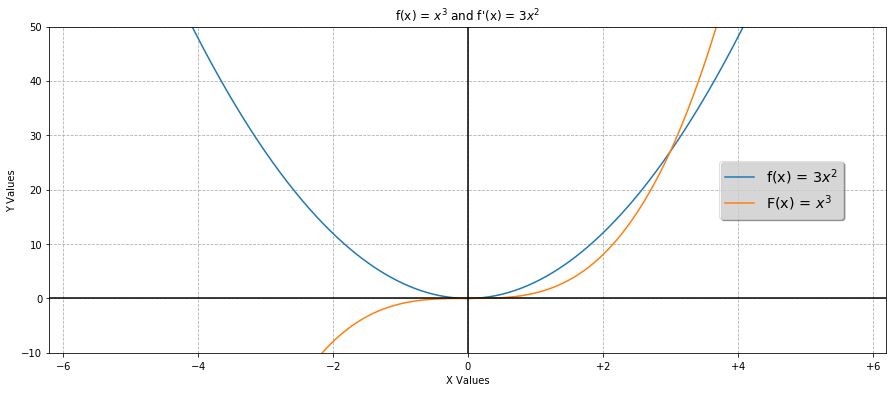

In [11]:
from matplotlib import pyplot as plt
from scipy.integrate import quad

def func(x):
    return 3*x**2

x_max = np.linspace(-10, 10, 10**4)

function = np.zeros(x_max.size)
integral = np.zeros(x_max.size)

for i in range(x_max.size):
    function[i] = func(x_max[i])
    integral[i], error = quad(func, 0, x_max[i])
    
fig = plt.figure(figsize=(15,6))
ax = plt.subplot()

ax.grid(linestyle='dashed')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('f(x) = $x^3$ and f\'(x) = $3x^2$')

ax.set_xticks([-6, -4, -2, 0, 2, 4, 6])
ax.set_xticklabels(['$-6$', '$-4$', '$-2$', '$0$', '$+2$', '$+4$', '$+6$'])

plt.plot(x_max, function, label='f(x) = $3x^2$')    
plt.plot(x_max, integral, label='F(x) = $x^3$')

plt.xlim(-6.2, 6.2)
plt.ylim(-10, 50)

# Add x and y-axis to the plot
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
    
legend = plt.legend(loc=5, fontsize='x-large', shadow=(True), borderaxespad=3)
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)

plt.show()

### References
A Primer on Scientific Programming with Python, 5e. Hans Petter Langtangen